# Forward Selection- Feature selection

### Step :1 Read the dataset

In [118]:
from warnings import filterwarnings
filterwarnings("ignore")

In [119]:
import pandas as pd
df= pd.read_csv("Cars93.csv",na_values=["","NA"],keep_default_na=False)
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


### Step 2 : Basic data quality check

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [121]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [122]:
df.duplicated().sum()

0

### Step 3 : Seperate X and Y

Weight ~ Remaining features

In [123]:
x = df.drop(columns=["id","Weight"])
y= df[["Weight"]]
x.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [124]:
y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Step 4 : Feature Selection Pipeline

In [125]:
cat = list(x.columns[x.dtypes == "object"])
con = list(x.columns[x.dtypes != "object"])

In [126]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [127]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [128]:
# Applicable for feature selection pipeline only
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [129]:
num_pipe1 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [130]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
)

In [131]:
pre1 = ColumnTransformer(
    [("num",num_pipe1,con),
     ("cat",cat_pipe1,cat)]
).set_output(transform="pandas")

In [132]:
x_pre1 = pre1.fit_transform(x)
x_pre1

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,...,0.000000,30.0,41.0,5.0,2.0,1.0,2.0,1.0,1.0,88.0
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,...,0.039228,30.0,64.0,0.0,2.0,1.0,1.0,1.0,1.0,90.0
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0.396643,30.0,28.0,4.0,2.0,1.0,3.0,1.0,1.0,87.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.039228,31.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,91.0


### Feature selection

In [133]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [134]:
sel = SequentialFeatureSelector(
    direction= "forward",
    n_features_to_select="auto",
    estimator= LinearRegression())
sel.fit(x_pre1,y)


SequentialFeatureSelector(estimator=LinearRegression(),
                          n_features_to_select='auto')

In [135]:
sel.get_feature_names_out()

array(['num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'num__Width', 'num__Rear.seat.room',
       'cat__Manufacturer', 'cat__Type', 'cat__Cylinders', 'cat__Origin'],
      dtype=object)

In [136]:
len(sel.get_feature_names_out())

13

In [137]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'num__Width', 'num__Rear.seat.room',
       'cat__Manufacturer', 'cat__Type', 'cat__Cylinders', 'cat__Origin'],
      dtype=object)

In [138]:
sel_cols[0]

'num__MPG.highway'

In [139]:
sel_cols[0].split('__')

['num', 'MPG.highway']

In [140]:
sel_cols[0].split("__")[1]

'MPG.highway'

In [141]:
imp_cols = [cols.split("__")[1] for cols in sel_cols]
imp_cols

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Rear.seat.room',
 'Manufacturer',
 'Type',
 'Cylinders',
 'Origin']

In [142]:
x_sel= x[imp_cols]
x_sel.head()

,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Rear.seat.room,Manufacturer,Type,Cylinders,Origin
0,31,140,6300,13.2,5,177,102,68,26.5,Acura,Small,4,non-USA
1,25,200,5500,18.0,5,195,115,71,30.0,Acura,Midsize,6,non-USA
2,26,172,5500,16.9,5,180,102,67,28.0,Audi,Compact,6,non-USA
3,26,172,5500,21.1,6,193,106,70,31.0,Audi,Midsize,6,non-USA
4,30,208,5700,21.1,4,186,109,69,27.0,BMW,Midsize,4,non-USA


### Step 4 : Create a final Preprocessing Pipeline

In [143]:
from sklearn.preprocessing import OneHotEncoder

In [144]:
cat_sel = list(x_sel.columns[x_sel.dtypes == "object"])
con_sel = list(x_sel.columns[x_sel.dtypes != "object"])

cat_sel

['Manufacturer', 'Type', 'Cylinders', 'Origin']

In [145]:
con_sel

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Rear.seat.room']

In [146]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [147]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

In [148]:
pre2 = ColumnTransformer([
    ("num",num_pipe2,con_sel),
    ("cat",cat_pipe2,cat_sel)
]
).set_output(transform="pandas")

In [149]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers', 'Length',
                                  'Wheelbase', 'Width', 'Rear.seat.room']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Type', 'Cylinders',
                                  'Origin'])])

In [150]:
x_sel_pre = pre2.fit_transform(x_sel)
x_sel_pre


,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.452197,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,0.431983,0.738090,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,0.057926,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.165927,1.078172,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,-0.100128,-0.282156,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-1.524806,-0.668585,-1.315292,1.359872,1.852158,0.261346,1.629649,0.698038,2.098419,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
89,0.172352,-0.188665,0.875050,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,1.248213,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90,-0.770514,0.655993,0.875050,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.622238,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
91,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.467905,0.007926,-0.632239,0.568049,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Step 5: Train Test Split

In [151]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_sel_pre,y,test_size=0.2,random_state=21)
xtrain.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
57,-0.016221,-0.265452,-0.304365,-0.663618,-0.083243,-0.564892,0.155356,-0.632239,-0.622238,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31,0.172352,-0.323043,2.054464,-1.062184,-0.083243,-0.840305,-0.876650,-0.632239,0.057926,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
62,-0.959087,1.116716,1.212025,0.716035,-0.083243,0.467905,0.450214,0.165927,-0.112115,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29,-0.204794,1.347077,0.875050,0.409445,0.884457,1.294143,1.334791,1.230149,0.738090,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51,-0.581941,1.270290,-1.146804,1.022624,0.884457,2.464647,1.924508,2.028316,1.248213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [152]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [153]:
xtrain.shape

(74, 55)

In [154]:
ytrain.shape

(74, 1)

### Step 6: Model building

In [155]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [156]:
model.coef_

array([[-8.65301977e+01,  2.27424665e+02, -6.65808336e+01,
        -1.60190450e+01,  3.86626933e+01,  7.70217587e+01,
         1.88796217e+02,  1.32740263e+02, -5.60694469e+01,
        -1.80839506e+02,  2.95739311e+02,  1.56907579e+02,
        -4.21136810e+01, -7.83162424e+01, -2.37892800e+01,
        -8.52651283e-14,  8.07499781e+01,  8.69439418e+01,
        -1.43010438e+02, -1.07875796e+01,  4.31996669e+00,
        -3.67434176e+01, -9.39625114e+00, -6.60924537e-01,
        -4.44754726e+00,  7.54530771e+01, -6.50714247e+01,
        -1.31727110e+02, -2.57538534e+01,  4.18200787e+00,
         6.07427963e+01, -4.96522615e+01,  1.50676713e+02,
        -2.35267440e+01, -1.26604884e+02, -5.75805930e+01,
         1.01231940e+02,  2.48689958e-14, -6.30286930e+01,
         9.33790390e+01, -3.72759192e+01, -2.13057441e+01,
        -4.71490455e+01, -2.48621361e+00, -2.71009512e+01,
        -4.65583608e+01,  1.44600315e+02,  9.68841012e+01,
         2.75552979e+01,  1.57720671e+02, -2.96751013e+0

In [157]:
coef = pd.Series(model.coef_.flatten(),index=xtrain.columns)
coef

num__MPG.highway                  -8.653020e+01
num__Horsepower                    2.274247e+02
num__RPM                          -6.658083e+01
num__Fuel.tank.capacity           -1.601904e+01
num__Passengers                    3.866269e+01
num__Length                        7.702176e+01
num__Wheelbase                     1.887962e+02
num__Width                         1.327403e+02
num__Rear.seat.room               -5.606945e+01
cat__Manufacturer_Acura           -1.808395e+02
cat__Manufacturer_Audi             2.957393e+02
cat__Manufacturer_BMW              1.569076e+02
cat__Manufacturer_Buick           -4.211368e+01
cat__Manufacturer_Cadillac        -7.831624e+01
cat__Manufacturer_Chevrolet       -2.378928e+01
cat__Manufacturer_Chrylser        -8.526513e-14
cat__Manufacturer_Chrysler         8.074998e+01
cat__Manufacturer_Dodge            8.694394e+01
cat__Manufacturer_Eagle           -1.430104e+02
cat__Manufacturer_Ford            -1.078758e+01
cat__Manufacturer_Geo              4.319

<Axes: >

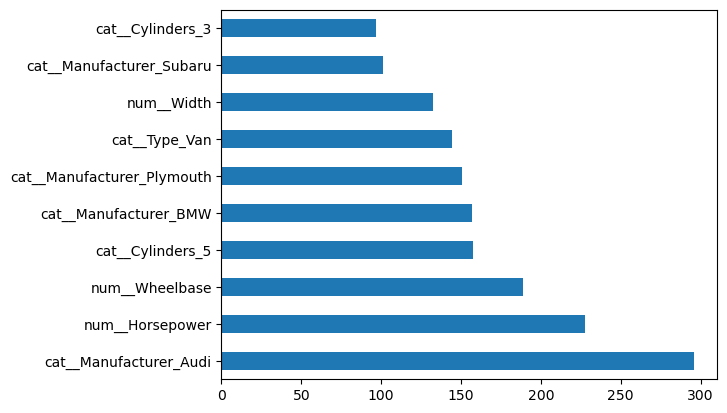

In [158]:
top_10 = coef.sort_values(ascending=False ).head(10)
top_10.plot(kind="barh")

In [159]:
bottom_10 = coef.sort_values().head(10)
bottom_10

cat__Manufacturer_Acura           -180.839506
cat__Manufacturer_Eagle           -143.010438
cat__Cylinders_8                  -141.299305
cat__Manufacturer_Mercedes-Benz   -131.727110
cat__Manufacturer_Saab            -126.604884
cat__Cylinders_rotary             -111.185664
num__MPG.highway                   -86.530198
cat__Manufacturer_Cadillac         -78.316242
num__RPM                           -66.580834
cat__Manufacturer_Mazda            -65.071425
dtype: float64

<Axes: >

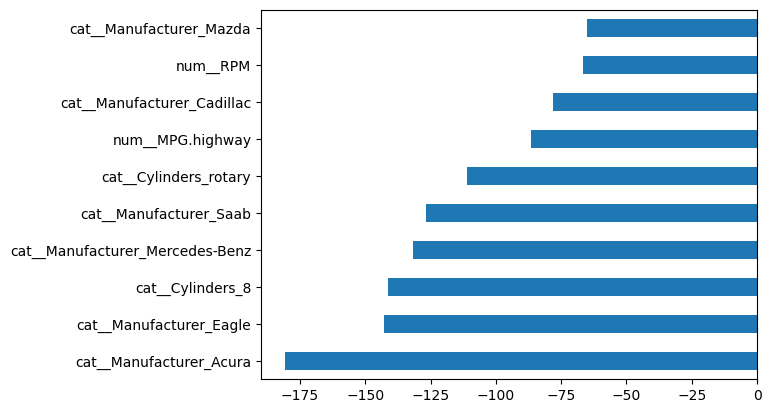

In [160]:
bottom_10.plot(kind="barh")

In [161]:
model.intercept_

array([3083.50357842])

### Step 7:Model Evaluation

In [162]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
def evaluate(model,x,y):
    ypred = model.predict(x)
    mse = mean_squared_error(y,ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2score = r2_score(y,ypred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2Score : {r2score:.4f}")


In [163]:
evaluate(model,xtrain,ytrain)

MSE : 4455.83
RMSE : 66.75
MAE : 45.95
MAPE : 0.0159
R2Score : 0.9868


In [164]:
evaluate(model,xtest,ytest)

MSE : 17972.04
RMSE : 134.06
MAE : 110.16
MAPE : 0.0365
R2Score : 0.9504


### From above both train and test have R2 Score >0.8 and r2 score improved after feature scaling

### Step 8 : Out of sample pridiction

In [165]:
xnew = pd.read_csv("sample.csv",na_values=["","NA"],keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [166]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers', 'Length',
                                  'Wheelbase', 'Width', 'Rear.seat.room']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Type', 'Cylinders',
                                  'Origin'])])

In [167]:
xnew_pre = pre2.transform(xnew)
xnew_pre

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,-0.581941,0.540813,0.369586,-0.510323,0.884457,0.467905,0.302785,-1.164350,1.078172,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.360925,-0.649388,-0.135877,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,-0.962320,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.016221,-0.649388,-0.135877,-0.050439,0.884457,1.018731,0.597644,0.431983,0.227967,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.770514,2.134145,2.054464,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.738071,-1.206095,0.369586,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-0.622238,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
preds = model.predict(xnew_pre)
preds

array([[3477.09598743],
       [2680.64392976],
       [3157.70033345],
       [2895.        ],
       [2253.46121153]])

In [169]:
xnew["weight_pred"] = preds

In [170]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3477.095987
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2680.643930
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3157.700333
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2895.000000
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2253.461212


In [171]:
xnew.to_csv("Forward_results.csv",index=False)